In [27]:
import pandas as pd
import warnings

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [2]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

<h2>Scraping Techniques</h2>

* As was mentioned in the problem statement Data Collection was the most difficult task.
* There are only a couple of E4W in India, that's why data had to be collected from multiple sources, also only few users have posted reviews, therfore the datset size is also small compared to E2W's
* Different methods had to be adopted to scrape from these sites as they display information differently 
<br><br>

* `Like for` **carwale.com** `all links of user reviews had to be extracted and then visiting each link the mentioned attributes were extracted`
<br>
<img src="images/carwale.png" alt="carwale" style="width: 50%;height: 40%"/>


In [6]:
df = pd.read_csv('reviews/carwale.csv')

In [7]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.drop(['review'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Exterior         129 non-null    float64
 1   Comfort          129 non-null    float64
 2   Performance      129 non-null    float64
 3   Fuel Economy     129 non-null    float64
 4   Value for Money  129 non-null    float64
 5   Condition        129 non-null    object 
 6   driven           129 non-null    object 
 7   rating           129 non-null    float64
dtypes: float64(6), object(2)
memory usage: 8.2+ KB


In [9]:
df.head(10)

,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating
0,5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0
1,3.0,2.0,1.0,2.0,1.0,New,Few thousand kilometers,0.0
2,5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0
3,2.0,2.0,1.0,1.0,1.0,New,Haven't driven it,0.0
4,5.0,5.0,5.0,5.0,5.0,Not Purchased,Few hundred kilometers,5.0
5,1.0,1.0,1.0,1.0,1.0,New,Haven't driven it,0.0
6,5.0,5.0,5.0,5.0,5.0,Used,Few thousand kilometers,5.0
7,5.0,5.0,5.0,5.0,5.0,Not Purchased,Haven't driven it,5.0
8,5.0,5.0,5.0,5.0,5.0,Not Purchased,Haven't driven it,5.0
9,4.0,5.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0


# Psychographic Analysis
### Here we can analyse all the preferences and reviews of the customers on various aspects.

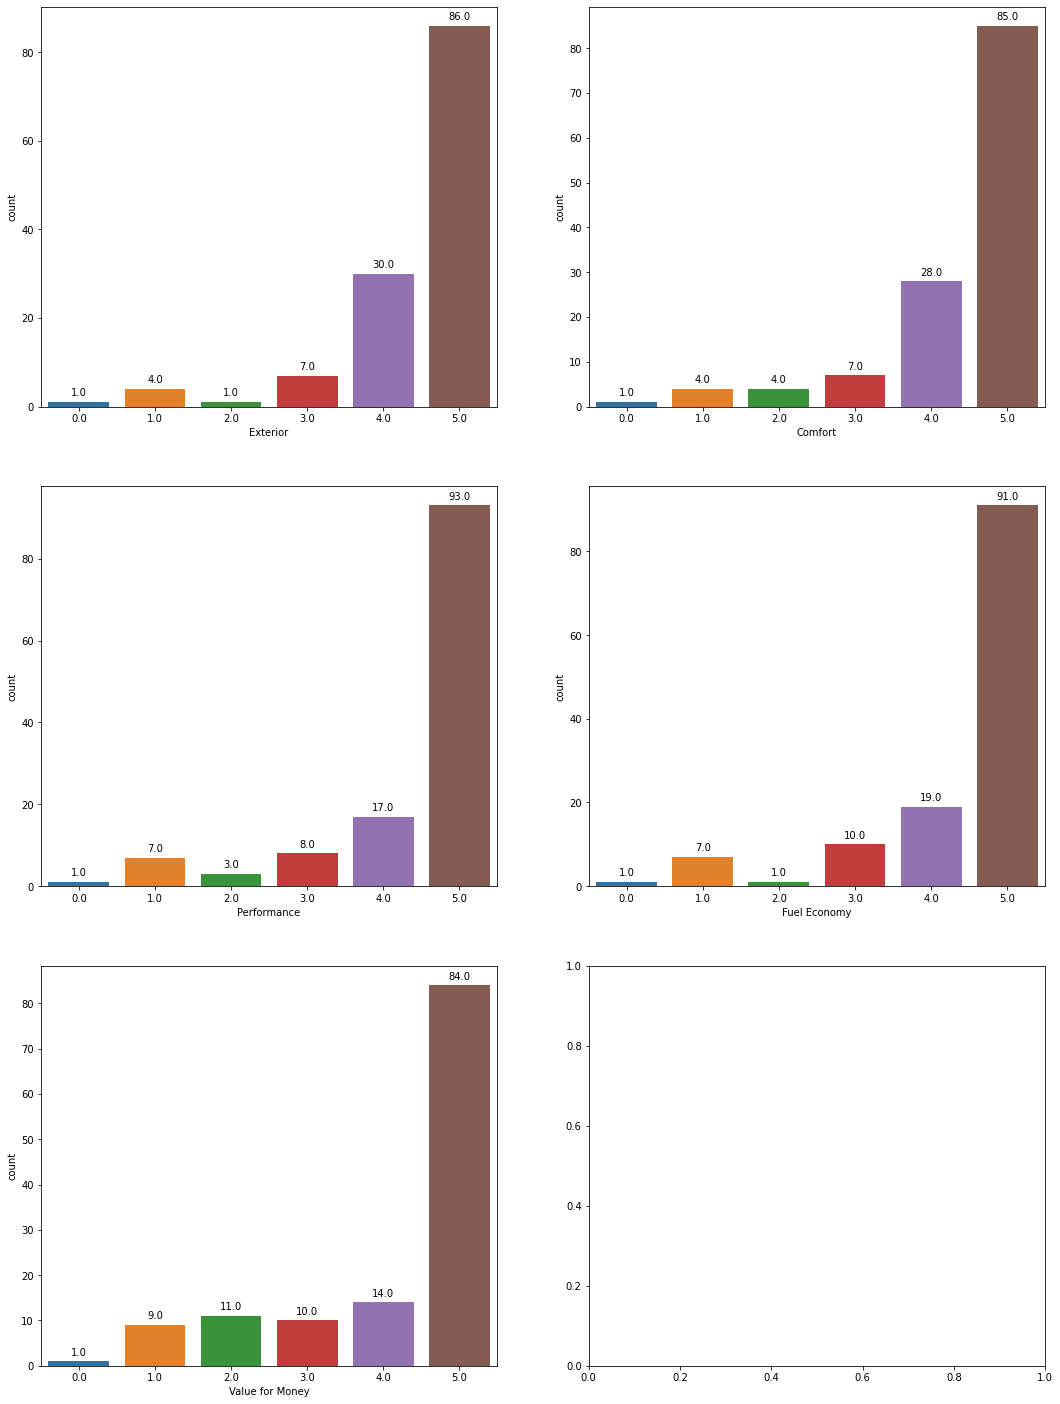

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 25))
splot = sns.countplot(data = df,x='Exterior', ax=axes[0][0])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')
        
splot = sns.countplot(data = df,x='Comfort', ax=axes[0][1])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')

splot = sns.countplot(data = df,x='Performance', ax=axes[1][0])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')

splot = sns.countplot(data = df,x='Fuel Economy', ax=axes[1][1])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')


splot = sns.countplot(data = df,x='Value for Money', ax=axes[2][0])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')



**Conclusions**

* People concerns for EV's are regarding Exterior Comfort Performance and Fuel Economy.

* People seem to be very postive about every aspect of EV's


# Behavioral Analysis
### We can look into the behavioral aspect of users,

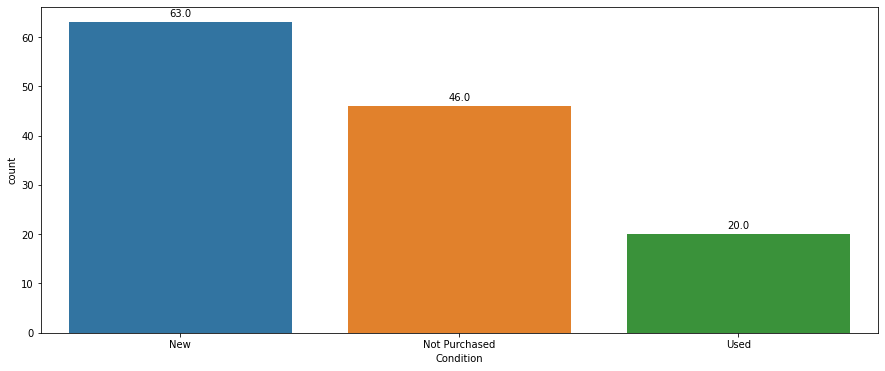

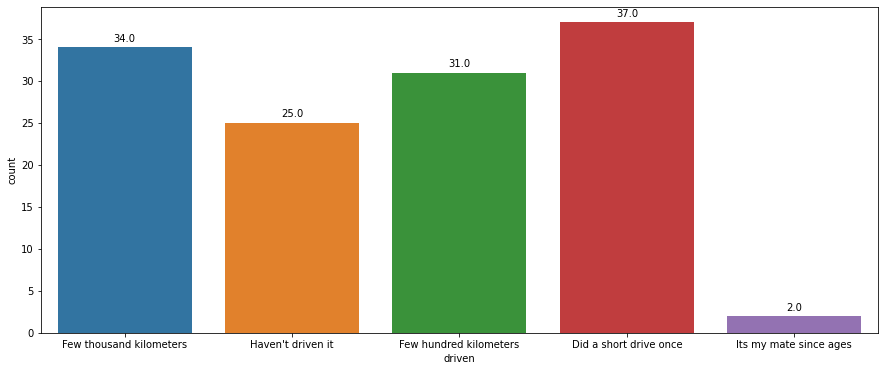

In [11]:
for col in df.columns[-3:-1].values:
    plt.figure(figsize=(15, 6))
    splot = sns.countplot(df[col])
    for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')
    plt.show(block=False)


# Segmentation

In [14]:
for col in df.columns:
    print(col, df[col].isnull().sum()/len(df)*100)

Exterior 0.0
Comfort 0.0
Performance 0.0
Fuel Economy 0.0
Value for Money 0.0
Condition 0.0
driven 0.0
rating 0.0


In [19]:
ordinalEncoder = OrdinalEncoder()
transformed = ordinalEncoder.fit_transform(df.loc[:,['Condition', 'driven']].values)
transformed = pd.DataFrame(transformed, columns=['Condition', 'driven'])
df.drop(['Condition', 'driven'], inplace=True, axis=1)
df = pd.concat([transformed, df], axis=1)

In [20]:
df

,Condition,driven,Exterior,Comfort,Performance,Fuel Economy,Value for Money,rating
0,0.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0
1,0.0,2.0,3.0,2.0,1.0,2.0,1.0,0.0
2,0.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0
3,0.0,3.0,2.0,2.0,1.0,1.0,1.0,0.0
4,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...
124,1.0,3.0,5.0,5.0,4.0,5.0,3.0,3.0
125,1.0,3.0,3.0,2.0,2.0,3.0,1.0,2.0
126,1.0,1.0,4.0,4.0,4.0,4.0,2.0,4.0
127,1.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0


## PCA and defining k for clustering

In [21]:
scaled_data = StandardScaler().fit_transform(df.values)

pca = PCA(n_components=0.95)

values = pca.fit_transform(scaled_data)

Silhoutte score for k = 2 is 0.5744083131407398
Silhoutte score for k = 3 is 0.3790843214747073
Silhoutte score for k = 4 is 0.30302771702964454
Silhoutte score for k = 5 is 0.2822725289824419
Silhoutte score for k = 6 is 0.29051182257834085
Silhoutte score for k = 7 is 0.31735443577839195


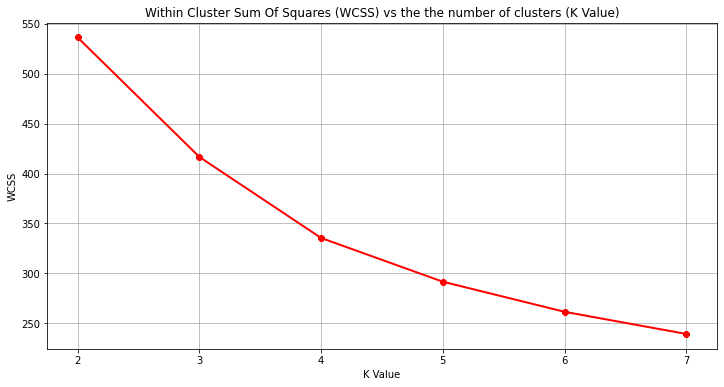

In [29]:
wcss = []
for k in range(2,8):
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(values)
    silhouette_avg = silhouette_score(values, cluster_labels)
    print(f'Silhoutte score for k = {k} is {silhouette_avg}')
    
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(2,8),wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(2,8,1))
plt.title('Within Cluster Sum Of Squares (WCSS) vs the the number of clusters (K Value)')
plt.ylabel("WCSS")
plt.show()

`We clealry observe an elbow at k=2`

<function matplotlib.pyplot.show(close=None, block=None)>

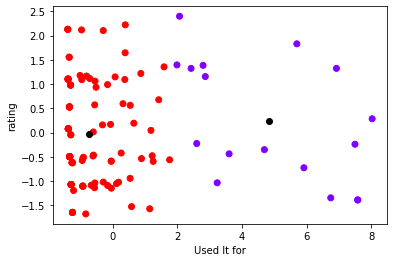

In [30]:
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(values)

plt.scatter(values[:,0], values[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.ylabel('rating')
plt.xlabel('Used It for')
plt.show

# Interpreting Segments

In [31]:
pred = kmeans.predict(values)
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame.head()

,Condition,driven,Exterior,Comfort,Performance,Fuel Economy,Value for Money,rating,cluster
0,0.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,1
1,0.0,2.0,3.0,2.0,1.0,2.0,1.0,0.0,0
2,0.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,1
3,0.0,3.0,2.0,2.0,1.0,1.0,1.0,0.0,0
4,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,1


In [33]:
df[['Condition', 'driven']] = pd.DataFrame(ordinalEncoder.inverse_transform(df.loc[:,['Condition', 'driven']].values), columns=['Condition', 'driven'])

In [35]:
df.head()

,Condition,driven,Exterior,Comfort,Performance,Fuel Economy,Value for Money,rating,cluster
0,New,Few thousand kilometers,5.0,5.0,5.0,5.0,5.0,5.0,1
1,New,Few thousand kilometers,3.0,2.0,1.0,2.0,1.0,0.0,0
2,New,Few thousand kilometers,5.0,5.0,5.0,5.0,5.0,5.0,1
3,New,Haven't driven it,2.0,2.0,1.0,1.0,1.0,0.0,0
4,Not Purchased,Few hundred kilometers,5.0,5.0,5.0,5.0,5.0,5.0,1


In [36]:
avg_df = df.drop(['Condition', 'driven'], 
                    axis=1).groupby(['cluster'], as_index=False).mean()
avg_df

,cluster,Exterior,Comfort,Performance,Fuel Economy,Value for Money,rating
0,0,2.705882,2.411765,1.941176,2.352941,1.470588,1.470588
1,1,4.741071,4.723214,4.794643,4.732143,4.571429,4.776786


In [38]:
for col in ['Condition', 'driven']:
    df2 = pd.DataFrame(df.groupby(['cluster',col])[col].count())
    print(df2, '\n\n')

                       Condition
cluster Condition               
0       New                    8
        Not Purchased          5
        Used                   4
1       New                   55
        Not Purchased         41
        Used                  16 


                                 driven
cluster driven                         
0       Did a short drive once        5
        Few hundred kilometers        3
        Few thousand kilometers       4
        Haven't driven it             5
1       Did a short drive once       32
        Few hundred kilometers       28
        Few thousand kilometers      30
        Haven't driven it            20
        Its my mate since ages        2 




## Main attributes of each segment:

* ### Cluster 0:
    * Average user rating is negative consisting of very few users
    * Are mix of new and long term owners
    * Have ridden the vehicle for shorter distances

* ### Cluster 1:
    * Average user rating is positive
    * Are mostly new owners
    * Have Ridden the vehicle for few thousand kms